In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import mne
from pathlib import Path
import seaborn as sns

from deepjr.simulation import jr_typical_param
from deepjr.simulation import JRSimulator, EventRelatedExp, SimResults

# Genral Information

These are the values for the Jansen Rit Model which are available in the literature, particularly from [this paper](https://mathematical-neuroscience.springeropen.com/articles/10.1186/s13408-017-0046-4/tables/1). The value of $v_{max}$ was corrected from 5 Hz to 50 Hz, a more reasonable value and a value that compatible with other publications (e.g., [this one](https://link.springer.com/article/10.1007/s10827-013-0493-1#Tab1)). Minimum and maximum values are defined as per [the code of The Virtual Brain](https://docs.thevirtualbrain.org/_modules/tvb/simulator/models/jansen_rit.html).




| Parameter  | Description                                                                  | Typical value | min value | max value |
| ---------- | ---------------------------------------------------------------------------- | ------------- | --------- | --------- |
| $A_e$      | Average excitatory synaptic gain                                             | 3.25 mV       | 2.6 mV    | 9.75 mV   | 
| $A_i$      | Average inhibitory synaptic gain 	                                        | 22 mV         | 17.6 mV   | 110.0 mV  |
| $b_e$	     | Inverse of the time constant of excitatory postsynaptic potential            | 100 Hz        | 50 Hz     | 150 Hz    |
| $b_i$	     | Inverse of the time constant of inhibitory postsynaptic potential            | 50 Hz         | 25 Hz     | 75 Hz     |
| $C$	     | Average number of synapses between the populations 	                        | 135           | 65        | 1350      |
| $a_1$      | Average probability of synaptic contacts in the feedback excitatory loop     | 1.0           | 0.5       | 1.5       |
| $a_2$	     | Average probability of synaptic contacts in the slow feedback excitatory loop| 0.8           | 0.4       | 1.2       |
| $a_3$	     | Average probability of synaptic contacts in the feedback inhibitory loop     | 0.25          | 0.125     | 0.375     |
| $a_4$	     | Average probability of synaptic contacts in the slow feedback inhibitory loop| 0.25          | 0.125     | 0.375     |
| $v_{max}$  | Maximum firing rate of the neural populations (max. of sigmoid fct.)         | 50 Hz         |     -     |     -     | 
| $v_0$      | Value for which 50% of the maximum firing rate is attained 	                | 6 mV          | 3.12 mV   | 6.0 mV    |




In [2]:

import mne
import os
#Fetch all mne dataset if not dowloaded already 

data_path = Path(mne.datasets.sample.data_path(download=True, verbose=False))
sample_dir = data_path / "MEG" / "sample"
subjects_dir = data_path / "subjects"
mne.datasets.fetch_fsaverage()

os.environ['SUBJECTS_DIR'] = str(subjects_dir)

0 files missing from root.txt in /Users/deepatilwani/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/deepatilwani/mne_data/MNE-fsaverage-data/fsaverage


In [3]:
# Default Parameters from Jansen RIT model
parameters = dict(jr_typical_param)


In [4]:
parameters

{'A_e': 0.0032500000000000003,
 'A_i': 0.022,
 'b_e': 100,
 'b_i': 50,
 'C': 135,
 'a_1': 1.0,
 'a_2': 0.8,
 'a_3': 0.25,
 'a_4': 0.25,
 'v_max': 0.05,
 'v_0': 0.006}

### Getting and info structure, a montage, and a noise covariance matrix for simulation

In [5]:
# Set up the simulator. This also create a head model for EEG simulation. Using mne dataset fsaverage
jr_sim = JRSimulator()

# Set the experiment.
er_exp = EventRelatedExp(jr_sim.info)

Reading forward solution from /Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/notebooks/fsaverage-fwd.fif.gz...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read EEG forward solution (8196 sources, 64 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


scale_factor has been deprecated and will be removed. Use scale instead.


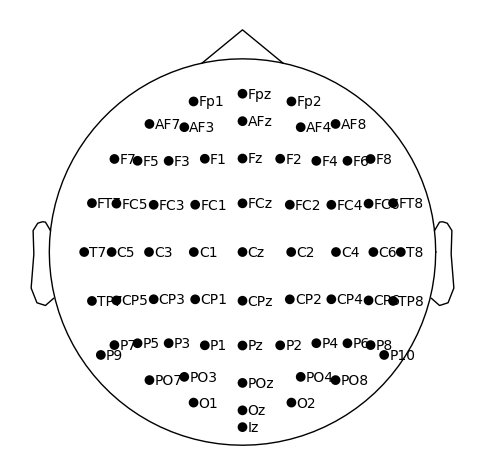

In [6]:
# Plot the montage with adjusted font size
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
mne.viz.plot_montage(jr_sim.montage, scale_factor=20, axes=ax, show_names=True)

fig.savefig('montage_plot.png', dpi=300, bbox_inches='tight')

### Generate stimulus

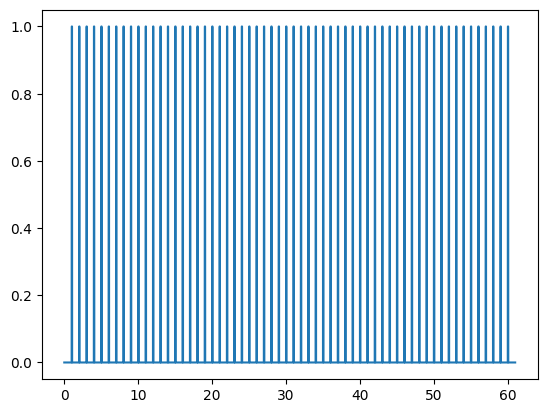

In [7]:
er_exp.plot_stimulus()

### Run an example of simulation

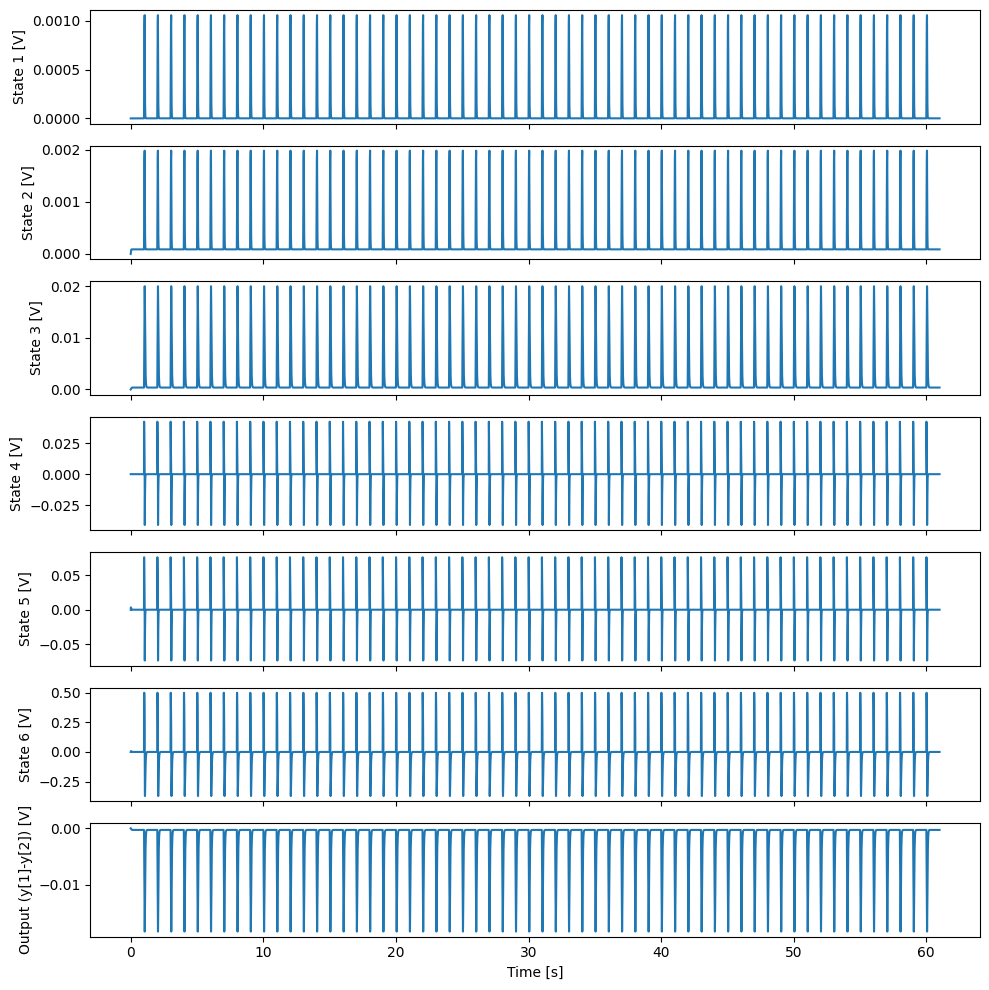

In [8]:
jr_sim.run_simulation(er_exp, parameters, jr_noise_sd=0.0)
jr_sim.plot_jr_results();

Reading labels from parcellation...
   read 1 labels from /Users/deepatilwani/mne_data/MNE-sample-data/subjects/fsaverage/label/lh.aparc.annot
   read 0 labels from /Users/deepatilwani/mne_data/MNE-sample-data/subjects/fsaverage/label/rh.aparc.annot
Setting up raw simulation: 1 position, "cos2" interpolation
Event information not stored
    Interval 0.000–1.000 s
Setting up forward solutions
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interva

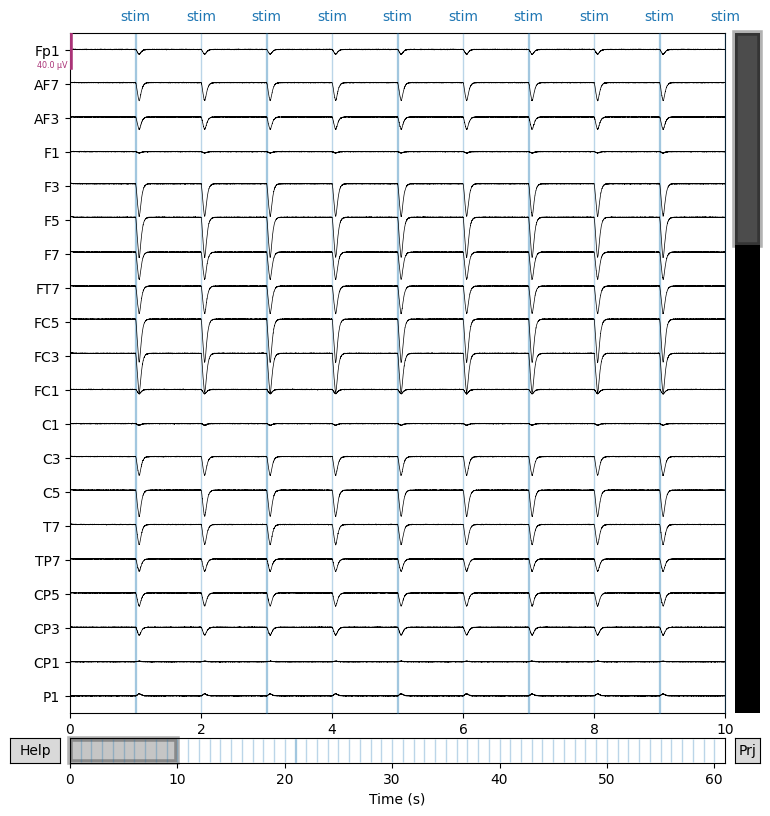

In [9]:
noise_fact =    1 #1e3

jr_sim.generate_raw(seed=0, noise_fact=noise_fact)
jr_sim.raw.plot();

Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated


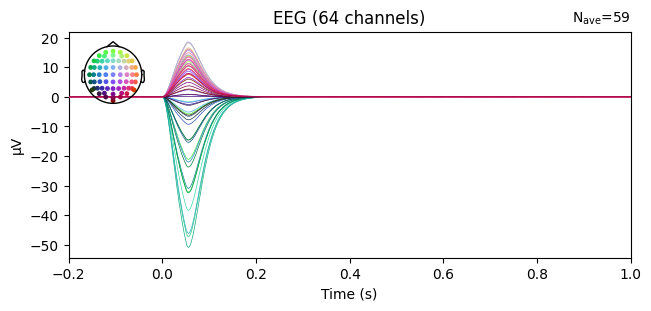

In [10]:
jr_sim.generate_evoked(er_exp)
jr_sim.evoked.plot();

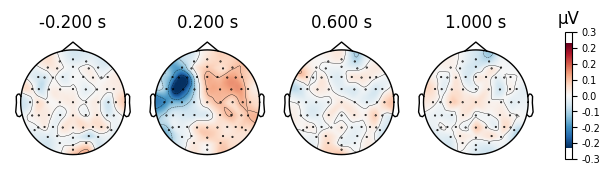

In [11]:
jr_sim.evoked.plot_topomap();

## EEG simulations

In [12]:
recompute = False

base_path = Path('deepjr_training_data')
base_path.mkdir(exist_ok=True)
method = 'normal'  # normal distribution of parameters
nb_sims = 1000
sim_results = SimResults(nb_sims, noise_fact, base_path)

if not sim_results.full_path.exists() or recompute:
    # Simulation per parameter calling the function
    mne.set_log_level(verbose=False)
    jr_sim.simulate_for_parameter(er_exp, method=method, 
                                  nb_sims=nb_sims, noise_fact=noise_fact,
                                  base_path=base_path, use_tqdm=True)

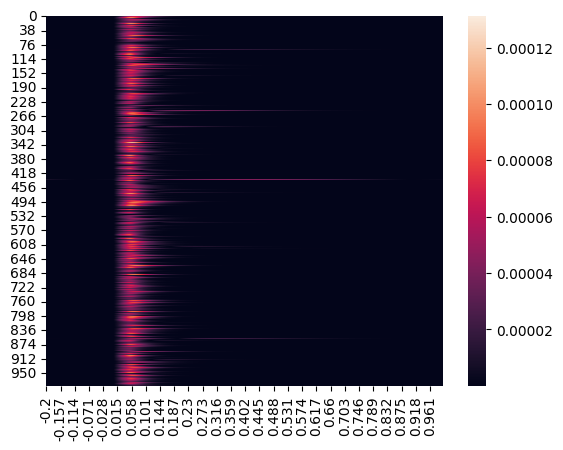

In [13]:
sim_results = SimResults(nb_sims, noise_fact, base_path)
sim_results.load()
sim_results.clean()
sim_results.plot_evoked_heatmap()

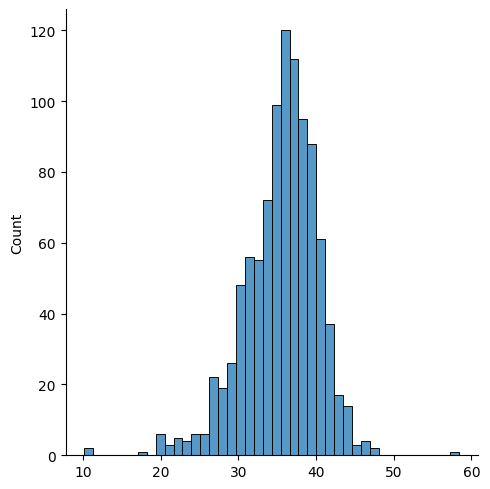

In [14]:
sns.displot(sim_results.snr)

In [15]:
noise_fact

1

# Training

In [16]:
# Correct the import
from deepjr.transformer import EEGTransformer, JRInvDataLoader


path = "./deepjr_training_data"
estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000

# Initialize the Data Loader
data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)
data_loader.prepare_data()

# Get dimensions: assume X_train shape is (num_samples, num_channels, num_timepoints)
num_channels = data_loader.X_train.shape[1]
num_timepoints = data_loader.X_train.shape[2]

model = EEGTransformer(
    num_channels=num_channels, 
    num_timepoints=num_timepoints,
    output_dim=len(estim_params), 
    estim_params=estim_params,
    embed_dim=256,        # Increased embedding dimension
    num_heads=8,          # Increased number of attention heads (256 is divisible by 8)
    hidden_dim=128,       
    hidden_ffn_dim=512,   # Increased feed-forward network hidden dimension
    intermediate_dim=1024,# Increased intermediate dimension
    ffn_output_dim=256,   # Increased FFN output dimension
    dropout=0.3           # Slightly higher dropout for better regularization
)

# Train the model
model.train_model(data_loader.X_train, data_loader.y_train, data_loader.X_val, data_loader.y_val, epochs=50, batch_size=32)

# Evaluate the model
model.evaluate_model(data_loader.X_test, data_loader.y_test)

# Plot predictions vs. actual values
model.plot_test_regressions(data_loader.X_test, data_loader.y_test)

# Print correlations between predictions and actual values
model.print_correlations(data_loader.X_test, data_loader.y_test);

Epoch [1/50], Loss: 0.2002
Epoch [2/50], Loss: 0.0307
Epoch [3/50], Loss: 0.0285
Epoch [4/50], Loss: 0.0286
Epoch [5/50], Loss: 0.0289
Epoch [6/50], Loss: 0.0298
Epoch [7/50], Loss: 0.0291
Epoch [8/50], Loss: 0.0294
Epoch [9/50], Loss: 0.0299
Epoch [10/50], Loss: 0.0290
Epoch [11/50], Loss: 0.0278
Epoch [12/50], Loss: 0.0269
Epoch [13/50], Loss: 0.0258
Epoch [14/50], Loss: 0.0254
Epoch [15/50], Loss: 0.0251
Epoch [16/50], Loss: 0.0253
Epoch [17/50], Loss: 0.0252
Epoch [18/50], Loss: 0.0251
Epoch [19/50], Loss: 0.0255
Epoch [20/50], Loss: 0.0257
Epoch [21/50], Loss: 0.0262
Epoch [22/50], Loss: 0.0256
Epoch [23/50], Loss: 0.0246
Epoch [24/50], Loss: 0.0231
Epoch [25/50], Loss: 0.0230
Epoch [26/50], Loss: 0.0227
Epoch [27/50], Loss: 0.0226
Epoch [28/50], Loss: 0.0233
Epoch [29/50], Loss: 0.0223
Epoch [30/50], Loss: 0.0231
Epoch [31/50], Loss: 0.0221
Epoch [32/50], Loss: 0.0222
Epoch [33/50], Loss: 0.0223
Epoch [34/50], Loss: 0.0220
Epoch [35/50], Loss: 0.0232
Epoch [36/50], Loss: 0.0227
E

KeyboardInterrupt: 

In [ ]:
# Correct the import
from deepjr.jr_inv_lstm_model import JRInvLSTMModel, JRInvDataLoader

# Set parameters
path = Path("./deepjr_training_data")
estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000
noise_fact = noise_fact
output_dir = "./jr_transformer_output"

## Initialize the data loader and prepare data
data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)

# Prepare the data (load and scale)
data_loader.prepare_data()
# Initialize the LSTM model
seq_length = data_loader.X_train.shape[1]  # (number of time steps)
input_dim = data_loader.X_train.shape[2]   # (number of features, EEG channels)

model = JRInvLSTMModel(input_dim=input_dim, 
                       seq_length=seq_length,  # Pass seq_length
                       num_params=len(estim_params),
                       estim_params=estim_params,
                       hidden_size=64, num_layers=2, dropout=0.2)

# Train the model using JRInvDataLoader's train_model method
model.train_model(data_loader.X_train, data_loader.y_train, epochs=50, batch_size=32)



Epoch [1/50], Loss: 0.0023
Epoch [2/50], Loss: 0.0009
Epoch [3/50], Loss: 0.0008
Epoch [4/50], Loss: 0.0008
Epoch [5/50], Loss: 0.0008
Epoch [6/50], Loss: 0.0008
Epoch [7/50], Loss: 0.0008
Epoch [8/50], Loss: 0.0008
Epoch [9/50], Loss: 0.0008
Epoch [10/50], Loss: 0.0008
Epoch [11/50], Loss: 0.0008
Epoch [12/50], Loss: 0.0007
Epoch [13/50], Loss: 0.0007
Epoch [14/50], Loss: 0.0007
Epoch [15/50], Loss: 0.0007
Epoch [16/50], Loss: 0.0007
Epoch [17/50], Loss: 0.0007
Epoch [18/50], Loss: 0.0007
Epoch [19/50], Loss: 0.0007
Epoch [20/50], Loss: 0.0007
Epoch [21/50], Loss: 0.0007
Epoch [22/50], Loss: 0.0007
Epoch [23/50], Loss: 0.0007
Epoch [24/50], Loss: 0.0007
Epoch [25/50], Loss: 0.0007
Epoch [26/50], Loss: 0.0007
Epoch [27/50], Loss: 0.0007
Epoch [28/50], Loss: 0.0007
Epoch [29/50], Loss: 0.0007
Epoch [30/50], Loss: 0.0007
Epoch [31/50], Loss: 0.0007
Epoch [32/50], Loss: 0.0006
Epoch [33/50], Loss: 0.0006
Epoch [34/50], Loss: 0.0006
Epoch [35/50], Loss: 0.0006
Epoch [36/50], Loss: 0.0006
E

Test MSE Loss: 0.0316


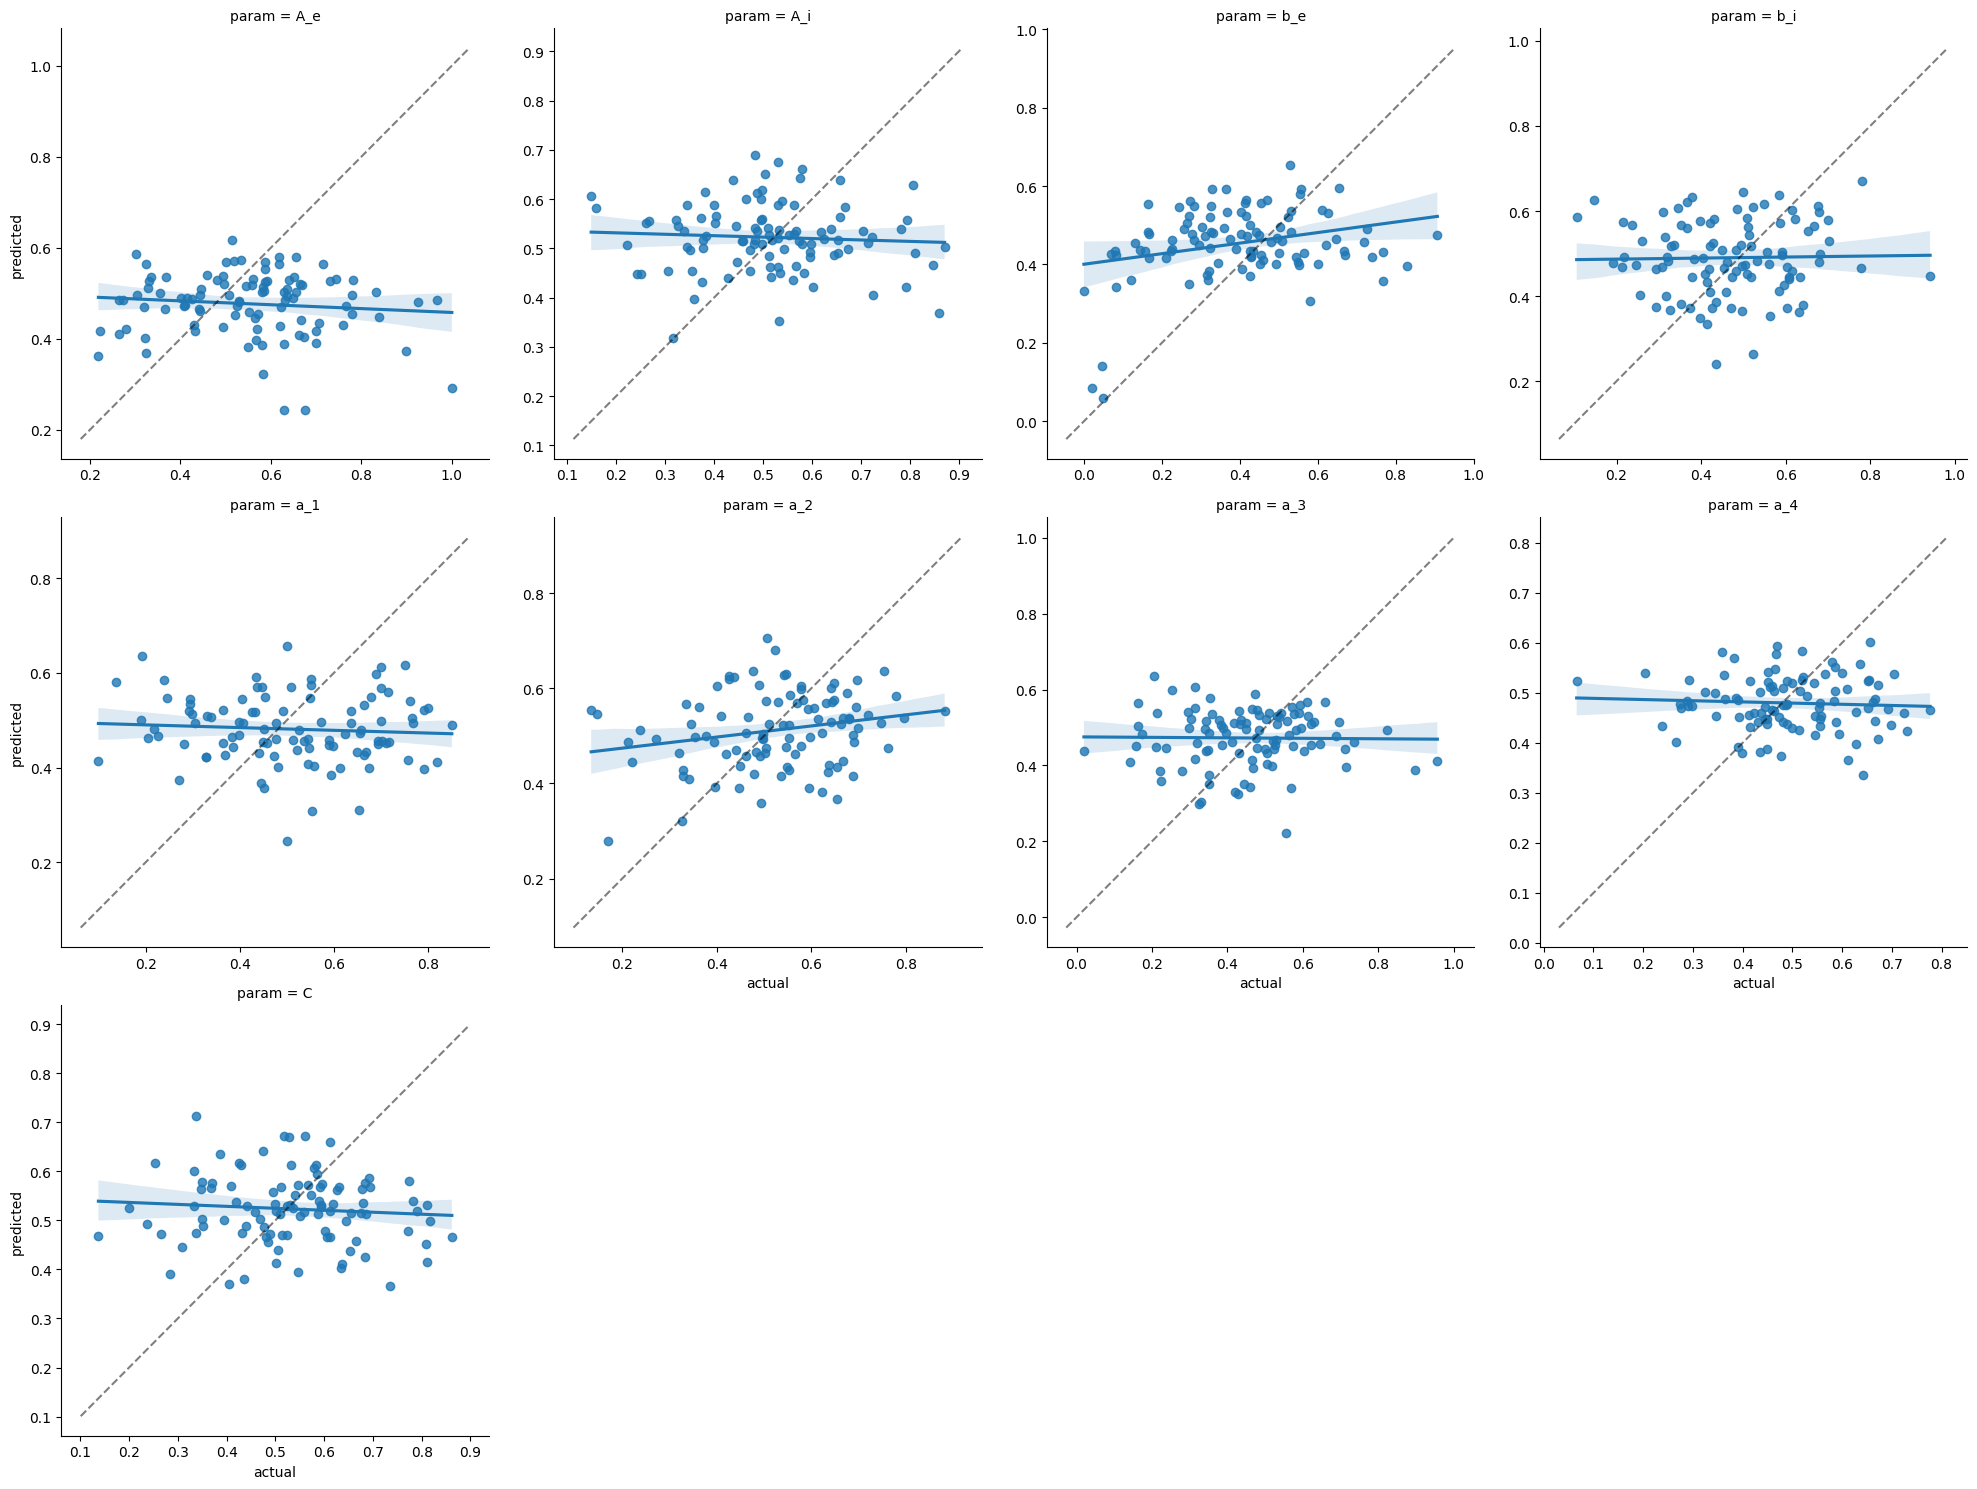

In [ ]:
# Evaluate the model
mse_loss = model.evaluate_model(data_loader.X_test, data_loader.y_test)

# Plot predictions vs actual values
model.plot_test_regressions(data_loader.X_test, data_loader.y_test, estim_params)


In [ ]:

corr = model.print_correlations(data_loader.X_test, data_loader.y_test, estim_params)

Pearson correlation for A_e: -0.10215130360925233
Pearson correlation for A_i: -0.06396434050287209
Pearson correlation for b_e: 0.2807318057774932
Pearson correlation for b_i: 0.021085892403646646
Pearson correlation for a_1: -0.070520898265175
Pearson correlation for a_2: 0.22165146860300217
Pearson correlation for a_3: -0.014083159412884221
Pearson correlation for a_4: -0.057387897177655994
Pearson correlation for C: -0.08441446899077727


In [ ]:
from deepjr.inference import JRInvModel
from deepjr.utils import reset_random_seeds

recompute = True
epochs = 150
batch_size=32

inv_model = JRInvModel(nb_sims=nb_sims, noise_fact=noise_fact, path=base_path)

if not inv_model.full_path_model.exists() or recompute:
    reset_random_seeds()  # Reset the seeds
    inv_model.train_model(epochs, batch_size=batch_size)
    inv_model.save()
else:
    inv_model.load()

Epoch 1/150


/Users/deepatilwani/Documents/Phd_projects/DCM/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 3.0194 - mse: 0.5378 - val_loss: 2.1211 - val_mse: 0.4344
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 1.9591 - mse: 0.4217 - val_loss: 1.4187 - val_mse: 0.3695
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.9681 - mse: 0.3355 - val_loss: 0.5860 - val_mse: 0.3052
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.2397 - mse: 0.2849 - val_loss: -0.2359 - val_mse: 0.2525
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: -0.8435 - mse: 0.2212 - val_loss: -1.2078 - val_mse: 0.2021
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: -2.0682 - mse: 0.1672 - val_loss: -2.1187 - val_mse: 0.1641
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: -3.1325 - mse: 0.1307 - val_loss: -3.1708 - val_mse: 0.1295
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: -4.1481 - mse: 0.1036 - val_loss: -4.1059 - val_mse: 0.1039
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/ste

# Assessment

In [ ]:
# Create a small testing set
mne.set_log_level(verbose=False)
jr_sim.simulate_for_parameter(er_exp, method="normal", 
                              nb_sims=50, noise_fact=noise_fact,
                              save=False, use_tqdm=True)
jr_sim.sim_results.clean()
#sim_results.plot_evoked_heatmap()

dataset = jr_sim.sim_results.dataset

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
X = dataset.evoked.transpose("sim_no", "time", "ch_names").values
y = dataset.parameters.sel(param=inv_model.estim_params).values

In [ ]:
inv_model.assess_model(parameter='all', X=X, y=y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: -9.5713 - mse: 0.0299
Results for all: Loss = -9.511505126953125, MSE = 0.03005019575357437
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


,pvalue,correlation,parameter
0,0.856952,0.026429,A_e
1,0.840042,0.029592,A_i
2,0.971135,0.005306,b_e
3,0.242312,0.170204,b_i
4,0.212701,0.181224,a_1
5,0.574725,0.082143,a_2
6,0.967807,-0.005918,a_3
7,0.104700,-0.234592,a_4
8,0.413086,0.119592,C


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


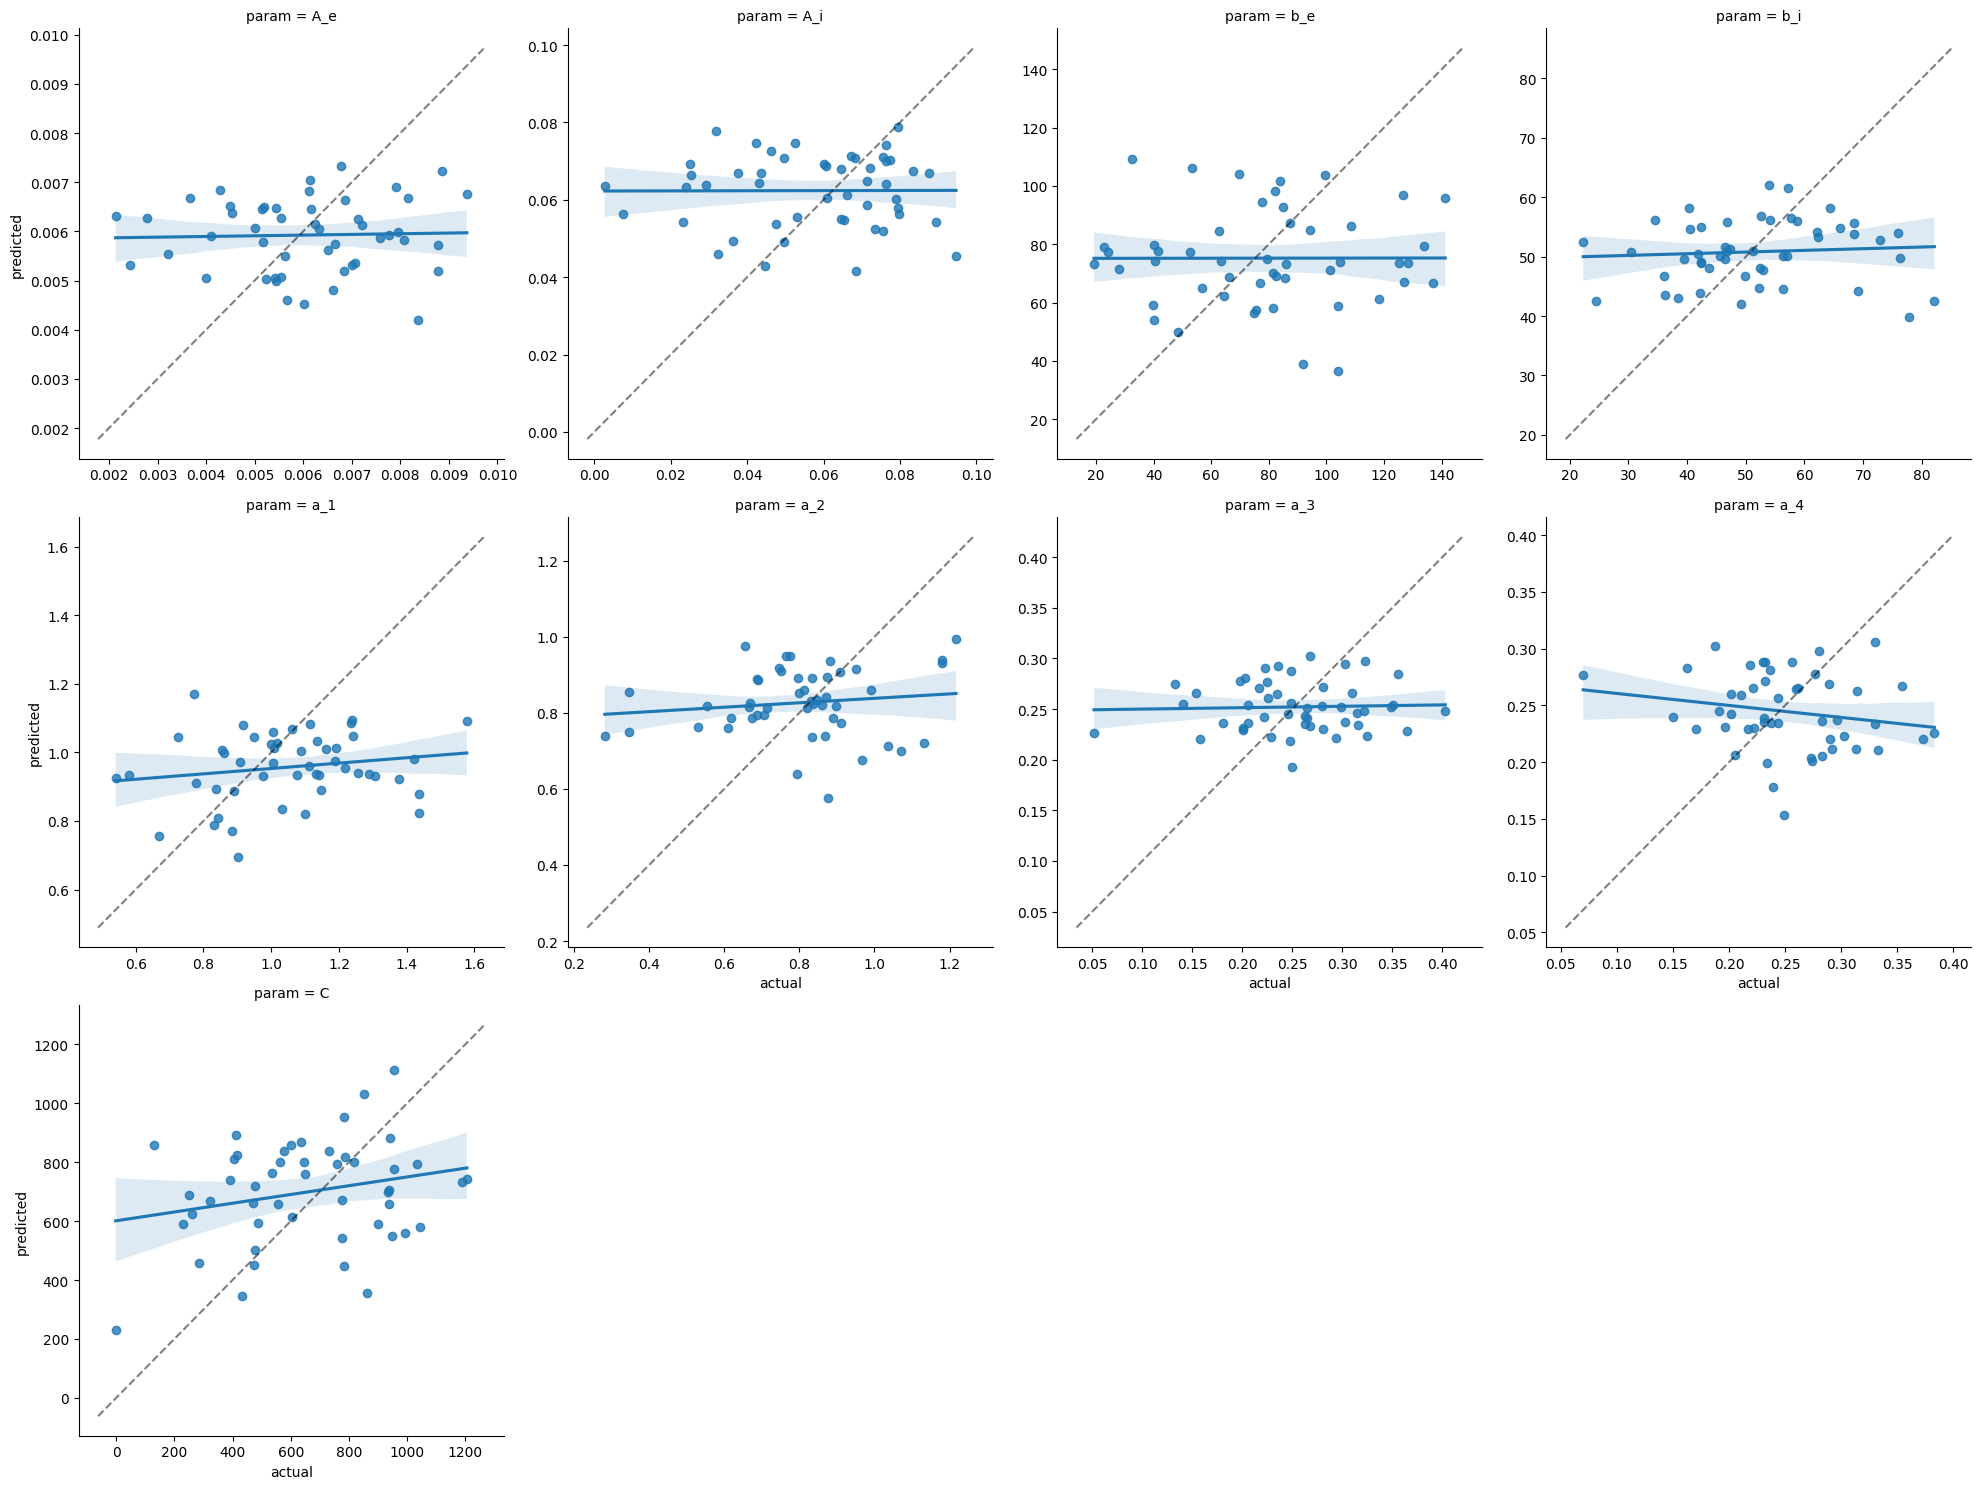

In [ ]:
inv_model.plot_test_regressions( X=X, y=y)